### Score: `[103]`

Q1. `[9]` Good job! 注意细节

Q2. `[11]` Very good job!

Q3. `[16.5+5.5]` 很完美的实现！！

Q4. `[5.5+14+4]` 有一些小错误，详见注释。

Q5. `[5.5+26。5+5.5]` Good job!

各题注释用`### Note`给出，请自行查阅。

**Collaboration:**  

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own. 

There are two requirements for collaboration: 

* Cite your collaborators **fully and completely** (*e.g.*, "XXX explained to me what is asked in problem set 3"). Or cite online resources (*e.g.*, "I got inspired by reading XXX") that helped you.

* Write your scripts and report **independently** - the scripts and report must come from you only.

# 1. Flowchart 

Write a function `Print_values` with arguments `a`, `b`, and `c` to reflect the following flowchart. Here the purple parallelogram operator on a list `[x, y, z]` is to compute and print `x+y-10z`. Try your output with some random `a`, `b`, and `c` values. Report your output when `a = 10, b = 5, c = 1`.

In [4]:
#From large to small order
def Print_values():
    x=0
    y=0
    z=0
    a=float(input("a:"))
    b=float(input("b:"))
    c=float(input("c:"))
    
    if (a>=b): ###Note: 注意图里是a>b, a==b算False，往流程图左边走
        x=a
        y=b
    else:
        x=b
        y=a
        
    if (c<y):
        z=c
    elif(c>=y and c<x):
        z=y
        y=c
    else:
        z=y
        y=x
        x=c
    print(x+y-10*z)
Print_values()

5.0


[The output of "a = 10, b = 5, c = 1" is 5]

# 2. Continuous ceiling function

Given a list with `N` positive integers. For every element `x` of the list, find the value of continuous ceiling function defined as `F(x) = F(ceil(x/3)) + 2x`, where `F(1) = 1`. 

In [16]:
import math
import numpy as np
#define the continuous ceiling function
def F(x):
    if x == 1:
        return 1
    else:
        return F(math.ceil(x / 3)) + 2 * x
#creat the list and calculate the value
N=int(input("positive interger number:"))
arr_N=np.random.randint(0,100,size=N)
value_of_fuction=[F(x) for x in arr_N]
print("list with N intergers:",arr_N)
print("the value of function is:",value_of_fuction)

positive interger number:5
list with N intergers: [61  6 20 44 21]
the value of function is: [185, 17, 61, 133, 63]


# 3. Dice rolling

**3.1** Given `10` dice each with `6` faces, numbered from `1` to `6`. Write a function `Find_number_of_ways` to find the number of ways to get sum `x`, defined as the sum of values on each face when all the dice are thrown.

In [2]:
import numpy as np

In [28]:
def Find_number_of_ways():
    x=int(input("The number of ways to get sum:"))
    #dp[i]--ways to get sum i
    dp = np.zeros(x + 1, dtype=int)
    dp[0] = 1
    # 10 dices with face number 1-6
    for _ in range(10):
        dp_new = np.zeros(x + 1, dtype=int)
        for i in range(1,x + 1):
            for face in range(1, 7):
                if i - face >= 0:
                    dp_new[i] = dp_new[i] + dp[i - face]
        dp = dp_new
    print(dp[x])
Find_number_of_ways()

4395456


**3.2** Count the number of ways for any `x` from `10` to `60`, assign the number of ways to a list called `Number_of_ways`, so which `x` yields the maximum of `Number_of_ways`?

In [18]:
#3.2
#fuction to get the number of ways of x
def Find_number_of_ways(x):
    #dp[i]--ways to get sum i
    dp = np.zeros(x + 1, dtype=int)
    dp[0] = 1
    # 10 dices with face number 1-6
    for _ in range(10):
        dp_new = np.zeros(x + 1, dtype=int)
        for i in range(1,x + 1):
            for face in range(1, 7):
                if i - face >= 0:
                    dp_new[i] = dp_new[i] + dp[i - face]
        dp = dp_new
    return dp[x]

#assign the number of ways to a list
Number_of_ways = []
for x in range(10, 61):
    ways=Find_number_of_ways(x)
    Number_of_ways.append(ways)
#x start with 10 which correspending the index_0
x_max_index=np.argmax(Number_of_ways)
x_max = x_max_index +10
print("the maximum number of ways to get sum",x_max,"is",Number_of_ways[x_max_index])

the maximum number of ways to get sum 35 is 4395456


So which `x` yields the maximum of `Number_of_ways`? [ x=35 yield the maximum of number of ways(4395456) ]

I got inspired by reading “python 实现动态规划”in CSDN https://blog.csdn.net/liulanba/article/details/115162382;
and check the answer with "骰子概率计算器"
https://www.calculatorultra.com/zh/tool/dice-probability-calculator.html

# 4. Dynamic programming

**4.1 [5 points]** Write a function `Random_integer` to fill an array of `N` elements by randomly selecting integers from `0` to `10`.

In [3]:
import random
import numpy as np
# 4.1
def Random_integer( ):
    N = int(input("Enter the number of elements: "))
    arr_N=np.random.randint(0, 11,size=N)
    return arr_N,N
Random_integer()

(array([8, 6, 9]), 3)

**4.2 [15 points]** Write a function `Sum_averages` to compute the sum of the average of all subsets of the array. For example, given an array of `[1, 2, 3]`, you `Sum_averages` function should compute the sum of: average of `[1]`, average of `[2]`, average of `[3]`,  average of `[1, 2]`, average of `[1, 3]`, average of `[2, 3]`, and average of `[1, 2, 3]`.  

In [9]:
# 4.2
from itertools import combinations
def Sum_averages(arr_N,N): 
    total_sum=0
    all_subsets = []
    #find all the subsets
    for i in range(1, N+1):
        subsets=itertools.combinations(arr_N,i) ### Note: 用 from... import ... 导入直接用combinations就好了
        for subset in subsets:
            total_sum = total_sum + sum(subset)/len(subset)
            all_subsets.append(subset)
    return total_sum,all_subsets

#generate array
arr_N,N=Random_integer()
print(arr_N)
sum_of_averages,all_subsets=Sum_averages(arr_N,N)
print("\nAll subsets:")
for subset in all_subsets:
    print(subset)
print("Sum of averages of all subsets:", sum_of_averages)

[ 6 10 10  0  1]

All subsets:
(1,)
(2,)
(6,)
(6,)
(8,)
(1, 2)
(1, 6)
(1, 6)
(1, 8)
(2, 6)
(2, 6)
(2, 8)
(6, 6)
(6, 8)
(6, 8)
(1, 2, 6)
(1, 2, 6)
(1, 2, 8)
(1, 6, 6)
(1, 6, 8)
(1, 6, 8)
(2, 6, 6)
(2, 6, 8)
(2, 6, 8)
(6, 6, 8)
(1, 2, 6, 6)
(1, 2, 6, 8)
(1, 2, 6, 8)
(1, 6, 6, 8)
(2, 6, 6, 8)
(1, 2, 6, 6, 8)
Sum of averages of all subsets: 142.6


I got inspired on how to generate subsets of array by reading "Python输出集合中的所有子集"
https://blog.csdn.net/An4480/article/details/135497880

**4.3 [5 points]** Call `Sum_averages` with `N` increasing from `1` to `100`, assign the output to a list called `Total_sum_averages`. Plot `Total_sum_averages`, describe what you see.


In [269]:
# 4.3
import matplotlib.pyplot as plt
#assign the output to a list
Total_sum_averages = []

def Random_array_N (N):
    arr_N = np.random.randint(0, 11, size=N)
    return arr_N

for N in range(1, 101):
    arr_N = Random_array_N(N)
    total_sum,_ = Sum_averages(arr_N,N)
    Total_sum_averages.append(total_sum)

# Plot a line
plt.plot(range(1, 101),Total_sum_averages)
# Add x and y labels
plt.xlabel("N")
plt.ylabel("Sum averages")
# Add figure title
plt.title("Sum of averages for subsets for array with N elements")
# Show plot
plt.show()

KeyboardInterrupt: 

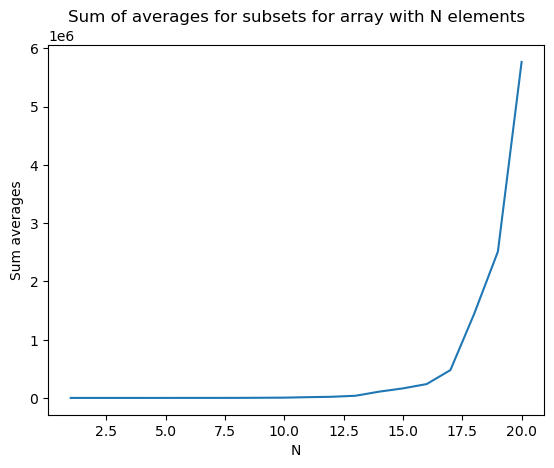

In [10]:
### Note: 算法是没有问题的，就是复杂度比较高，所以跑到100偏慢
# 4.3
import matplotlib.pyplot as plt
#assign the output to a list
Total_sum_averages = []

def Random_array_N (N):
    arr_N = np.random.randint(0, 11, size=N)
    return arr_N

for N in range(1, 21):
    arr_N = Random_array_N(N)
    total_sum,_ = Sum_averages(arr_N,N)
    Total_sum_averages.append(total_sum)

# Plot a line
plt.plot(range(1, 21),Total_sum_averages)
# Add x and y labels
plt.xlabel("N")
plt.ylabel("Sum averages")
# Add figure title
plt.title("Sum of averages for subsets for array with N elements")
# Show plot
plt.show()

Describe what you see. 

Fail to plot with N increasing :(

But，I suppose Total_sum_averages should show an upward trend as N increases.

# 5. Path counting

**5.1 [5 points]** Create a matrix with `N` rows and `M` columns, fill the right-bottom corner and top-left corner cells with `1`, and randomly fill the rest of matrix with integer `0` or `1`.

In [20]:
#creat a NxM matrix with random integer 0/1
N=int(input("rows:"))
M=int(input("colomns:"))
matrix = np.random.randint(0,2,(N,M))
#replace the unique place
matrix[0, 0] = 1
matrix[-1, -1] = 1
print(matrix)

rows:5
colomns:8
[[1 0 0 1 0 1 1 0]
 [1 0 0 1 0 1 1 1]
 [0 0 0 1 0 1 1 0]
 [1 0 1 1 0 1 0 0]
 [0 0 0 1 1 0 1 1]]


**5.2 [25 points]** Consider a cell marked with `0` as a blockage or dead-end, and a cell marked with `1` is good to go. Write a function `Count_path` to count the total number of paths to reach the right-bottom corner cell from the top-left corner cell. 

**Notice:** for a given cell, you are **only allowed** to move either rightward or downward.

In [13]:
def Count_path(matrix):
    dp = np.zeros((N, M), dtype=int)
    dp[0][0] = 1
    #the first row
    for j in range(1, M):
        if matrix[0][j] == 1:
            dp[0][j] = dp[0][j-1]
    #the first colomn
    for i in range(1, N):
        if matrix[i][0] == 1:
            dp[i][0] = dp[i-1][0]
    #the rest of places
    for i in range(1, N):
        for j in range(1, M):
            if matrix[i][j] == 1:
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
    #paths
    return dp[N-1][M-1]

#creat a NxM matrix with random integer 0/1
N=int(input("rows:"))
M=int(input("colomns:"))
matrix = np.random.randint(0,2,(N,M))
#replace the unique place
matrix[0, 0] = 1
matrix[-1, -1] = 1
print(matrix)
paths = Count_path(matrix)
print("the total number of paths is",paths)

the total number of paths is 0


I got inspired by reading “python 实现动态规划”in CSDN again https://blog.csdn.net/liulanba/article/details/115162382

**5.3 [5 points]** Let `N = 10, M = 8`, run `Count_path` for `1000` times, each time the matrix (except the right-bottom corner and top-left corner cells, which remain being `1`) is re-filled with integer `0` or `1` randomly, report the mean of total number of paths from the `1000` runs.

In [155]:
for _ in range(1000):
        matrix = np.random.randint(0,2,(10,8))
        matrix[0, 0] = 1
        matrix[-1, -1] = 1
        total_paths = total_paths + Count_path(matrix)
        
mean_paths = total_paths / 1000
print("the mean of total number of paths from the 1000 runs is",mean_paths)

the mean of total number of paths from the 1000 runs is 3.541


Report the mean of total number of paths from the `1000` runs. [3.541]